Expectation Value: 0.50000, x uncertainty: 0.28780, p uncertainty: 31.41593*h, Uncertainty Principle Test: 18.08278*h/2


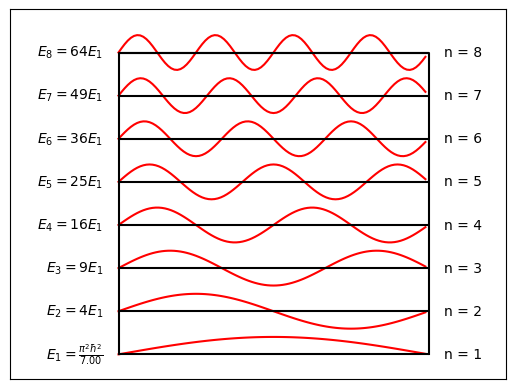

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad 

#User Controlled
m=3.5
L=1
h_bar=1.054571817e-34
E_1=(((np.pi)**2)*((h_bar)**2))/(2*m*L**2)

def wave_func(x, n: int): #n represents the energy level
    
    return (np.sqrt(2/L))*np.sin((n*np.pi*x)/L)


def squared_wave_function(x, n):
    
    return (wave_func(x, n))**2


def expectation_value(var: "x, p, x2, p2", n: int):
    '''
    Evaluates the expectation value of specified variable for a particle in an infinite square well
    
    Args:
        var (string): varibale to take the expectation value of
        n (int): energy level
        
    Returns:
        tuple: (expectation value, uncertainty in x, uncertainty in p, product of uncertainty in x and p)
    '''
    
    if var=='x':
        exp_val= lambda x, n: x*squared_wave_function(x, n) #Can also use the fact <x>=L/2 for all n
    
    elif var=='x2':
        exp_val= lambda x, n: (x**2)*squared_wave_function(x, n) #Can also use the fact <x^2> has a known express depending on n
        
    elif var=='p':
        exp_val= lambda x, n: wave_func(x, n)*(complex(0,-1))*h_bar*((np.sqrt(2/L))*(L/(n*np.pi))*np.cos((n*np.pi*x)/L)) #Can also use the fact <p>=0 for all n
        
    elif var=='p2':
        exp_val= lambda x, n: wave_func(x, n)*(h_bar**2)*((np.sqrt(2/L))*((L/(n*np.pi))**2)*np.sin((n*np.pi*x)/L)) #Can also use the fact <p^2>=n^2*pi^2*h_bar^2/L^2
    
    else:
        raise ValueError("Specifiy the varibale you would like to take the expectation value of. Accepts x, x2, p, or p2.")
        
    I, error= quad(exp_val, 0, L, args=n)
    
    x_uncertainty= lambda n: L*np.sqrt( (1/12) - (1/(2*(n**2)*(np.pi**2))))
    
    p_uncertainty= lambda n: n*np.pi/L
    
    xp_uncertainty= lambda n: 2*L*np.sqrt( (1/12) - (1/(2*(n**2)*(np.pi**2)))) * (n*np.pi/L)
    
    return f'Expectation Value: {"{0:.5f}".format(I)}, x uncertainty: {"{0:.5f}".format(x_uncertainty(n))}, p uncertainty: {"{0:.5f}".format(p_uncertainty(n))}*h, Uncertainty Principle Test: {"{0:.5f}".format((xp_uncertainty(n)))}*h/2' 


def plot_n_wave_funcs(n_max: "The n value you want to plot up to"):
    x=np.arange(0,L,0.01)

    fig, ax = plt.subplots()

    for n in range(1,n_max):
        psi= wave_func(x, n)
        ax.plot(x, psi + (n - 1) * 3.5, 'r')  #Offset for each wave function 
        ax.hlines((n - 1) * 3.5, 0, L, colors='black')  #Horizontal line for each energy level
        ax.text(L + 0.05, (n - 1) * 3.5, f'n = {n}', verticalalignment='center', horizontalalignment='left')  #Label on right side

        if n==1: #Label on left side with some extra condtions
            E_1_denom="{0:.2f}".format(2*m*L**2)
            ax.text(-0.05, (n - 1) * 3.5, rf'$E_{n} = \frac{{\pi^2 \hbar^2}}{{{E_1_denom}}}$', verticalalignment='center', horizontalalignment='right')  
        else:
            ax.text(-0.05, (n - 1) * 3.5, rf'$E_{n} = {n**2}E_1$', verticalalignment='center', horizontalalignment='right')  

    #Plotting the box
    ax.plot([0, 0, L, L], [0, (len(range(1,n_max)) - 1) * 3.5, (len(range(1,n_max)) - 1) * 3.5, 0], 'k')

    #Plotting axis limits 
    ax.set_xlim(-0.35, L + 0.25)
    ax.set_ylim(-2, len(range(1,n_max)) * 3.5)

    #Remove x and y ticks
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()
    

#Test cases
print(expectation_value('x',10))     
plot_n_wave_funcs(9)